In [103]:
import numpy as np
from scipy.linalg import solve_banded
import matplotlib.pyplot as plt

In [104]:
def mu_x1_0(x2):
    return x2 ** 2

def mu_x2_0(x1):
    return x1 ** 2

def mu_x1_1(x2):
    return 1+ x2 ** 2

def mu_x2_1(x1):
    return 1+ x1 ** 2

def true_f():
    return 4

In [198]:
def f(i, j, h, N):
    result = true_f()
    if i != 0 and j != 0 and i != N and j != N:
        if i == 1:
            result -= mu_x1_0(j*h)/h**2
        if j == 1:
            result -= mu_x2_0(i*h)/h**2
        if i == N - 1:
            result -= mu_x1_1(j*h)/h**2
        if j == N - 1:
            result -= mu_x2_1(i*h)/h**2
    return result

In [199]:
N=10
x, h = np.linspace(0,1,N+1, retstep=True)

In [200]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [201]:
f_arr = np.zeros((N+1,N+1))
for i in range(N+1):
    for j in range(N+1):
        f_arr[i,j] = f(i, j, h, N)

In [202]:
f_arr

array([[   4.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
           4.,    4.],
       [   4.,    2.,    0.,   -5.,  -12.,  -21.,  -32.,  -45.,  -60.,
        -178.,    4.],
       [   4.,    0.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
        -100.,    4.],
       [   4.,   -5.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
        -105.,    4.],
       [   4.,  -12.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
        -112.,    4.],
       [   4.,  -21.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
        -121.,    4.],
       [   4.,  -32.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
        -132.,    4.],
       [   4.,  -45.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
        -145.,    4.],
       [   4.,  -60.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
        -160.,    4.],
       [   4., -178., -100., -105., -112., -121., -132., -145., -160.,
        -358.,    4.],
       [   4.,    4.,    4.,    4.,    4.,    4.,    4.,    

In [203]:
def gsl(s, N, h, x):
    a = N * h
    return np.sqrt(2 / a) * np. sin(np.pi * s * x / a)

In [204]:
gsl(1, N, h, x)

array([0.00000000e+00, 4.37016024e-01, 8.31253876e-01, 1.14412281e+00,
       1.34499702e+00, 1.41421356e+00, 1.34499702e+00, 1.14412281e+00,
       8.31253876e-01, 4.37016024e-01, 1.73191211e-16])

In [205]:
fsk = np.zeros((N-1, N-1))
for k in range(1, N):
    for s in range(1, N):
        fsk[k-1, s-1] = h * np.sum(f_arr[k, 1:-1] * gsl(s, N, h, x)[1:-1])

In [206]:
fsk

array([[ -27.2874547 ,   30.07504775,  -23.76425811,   23.18246013,
         -20.78893937,   18.58740172,  -14.93932793,   10.61006796,
          -5.47643438],
       [  -1.14817586,    8.31253876,  -11.24630614,   13.44997024,
         -14.70782105,   13.44997024,  -12.06829518,    8.31253876,
          -4.63017729],
       [  -1.58519188,    8.31253876,  -12.39042895,   13.44997024,
         -16.12203461,   13.44997024,  -13.21241799,    8.31253876,
          -5.06719332],
       [  -2.19701431,    8.31253876,  -13.99220088,   13.44997024,
         -18.1019336 ,   13.44997024,  -14.81418991,    8.31253876,
          -5.67901575],
       [  -2.98364316,    8.31253876,  -16.05162193,   13.44997024,
         -20.64751801,   13.44997024,  -16.87361096,    8.31253876,
          -6.4656446 ],
       [  -3.94507841,    8.31253876,  -18.5686921 ,   13.44997024,
         -23.75878785,   13.44997024,  -19.39068114,    8.31253876,
          -7.42707985],
       [  -5.08132008,    8.31253876,  -

In [207]:
f_arr2 = np.zeros((N-1,N-1))
for k in range(1,N):
    for l in range(1,N):
        f_arr2[k-1,l-1] = np.sum(fsk[k-1,:] * gsl(l, N, h, x)[1:-1])
f_arr2

array([[ 2.00000000e+00,  4.44089210e-14, -5.00000000e+00,
        -1.20000000e+01, -2.10000000e+01, -3.20000000e+01,
        -4.50000000e+01, -6.00000000e+01, -1.78000000e+02],
       [-2.26485497e-14,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00, -1.00000000e+02],
       [-5.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00, -1.05000000e+02],
       [-1.20000000e+01,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00, -1.12000000e+02],
       [-2.10000000e+01,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00, -1.21000000e+02],
       [-3.20000000e+01,  4.00000000e+00,  4.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.000000

In [208]:
def ls(s, N, h):
    a = N * h
    return 4 / h**2 * np.sin(np.pi * s / (2*N)) ** 2

In [209]:
lambdas = np.zeros(N-1)
for s in range(1,N):
    lambdas[s-1] = ls(s, N, h)

In [210]:
lambdas

array([  9.78869674,  38.19660113,  82.44294954, 138.19660113,
       200.        , 261.80339887, 317.55705046, 361.80339887,
       390.21130326])

In [211]:


csk = np.zeros((N+1, N-1))
for s in range(1, N):
    A_s = np.zeros((3, N-1))
    A_s[0] = 1/h**2
    A_s[1] = -2/h**2 - lambdas[s-1]
    A_s[2] = 1/h**2
    csk[1:-1, s-1] = solve_banded((1,1), A_s, fsk[:, s-1])

In [212]:
y = np.zeros((N+1, N+1))
for k in range(0, N+1):
    for l in range(0, N+1):
        y[k,l] = np.sum(csk[k,:] * gsl(l, N, h, x)[1:-1])

In [219]:
y[0,:] = mu_x1_0(x)
y[-1,:] = mu_x1_1(x)
y[:,0] = mu_x2_0(x)
y[:,-1] = mu_x2_1(x)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10764\3994812842.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


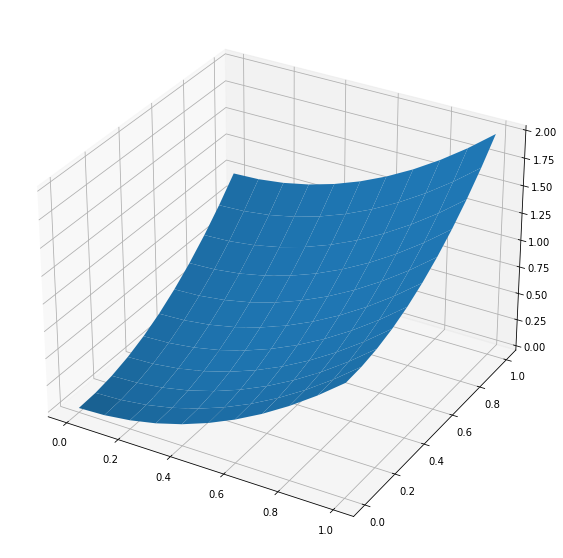

In [223]:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

X1, X2 = np.meshgrid(x,x)

surf = ax.plot_surface(X1, X2, y)
plt.savefig('Fourier.png')


In [222]:
def u_anal(x, y):
    return x ** 2 + y ** 2


h = 0.1
x_max = 1.

# генерируем сетку
x1 = np.arange(0, x_max + h, h) 
x2 = np.arange(0, x_max + h, h)
X1, X2 = np.meshgrid(x1, x2)
U1 = u_anal(X1, X2)

np.linalg.norm(y - U1) * h

4.2191285208314175e-16